# Preparation

In [3]:
pip install scikit-learn==1.6.1

  Using cached scikit_learn-1.6.1-cp312-cp312-win_amd64.whl.metadata (15 kB)
Using cached scikit_learn-1.6.1-cp312-cp312-win_amd64.whl (11.1 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.4.2
    Uninstalling scikit-learn-1.4.2:
      Successfully uninstalled scikit-learn-1.4.2
Note: you may need to restart the kernel to use updated packages.


  You can safely remove it manually.


In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from imblearn.over_sampling import SMOTE, RandomOverSampler
import os
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import pickle

In [5]:
# Load dataset
file_path = "C:/Users/ghaza/Desktop/FYP/Application/AI/data/processed/cleaned_dataset.csv"
data = pd.read_csv(file_path)

# Display dataset info
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174954 entries, 0 to 174953
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Hydraulic_Pressure             174954 non-null  float64
 1   Coolant_Pressure               174954 non-null  float64
 2   Ambient_Temperature            174954 non-null  float64
 3   Voltage                        174954 non-null  float64
 4   Humidity                       174954 non-null  float64
 5   Air_System_Pressure            174954 non-null  float64
 6   Coolant_Temperature            174954 non-null  float64
 7   Hydraulic_Oil_Temperature      174954 non-null  float64
 8   Water_Flow_Rate                174954 non-null  float64
 9   Water_Temperature              174954 non-null  float64
 10  Detergent_Level                174954 non-null  float64
 11  Spray_Pressure                 174954 non-null  float64
 12  Vibration                     

In [4]:
# Identify numerical features
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
numeric_cols = [col for col in numeric_cols if col != 'machine_failure']

# Initialize scaler
scaler = StandardScaler()

# Apply scaling
data_scaled = scaler.fit_transform(data[numeric_cols])
data[numeric_cols] = pd.DataFrame(data_scaled, columns=numeric_cols).round(4)

# Update the dataset with scaled values
data[numeric_cols] = data_scaled

In [5]:
# Save the StandardScaler
with open(r"C:\Users\ghaza\Desktop\FYP\Application\AI\models\scaler.pkl", 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

In [6]:
# Check dependency between binary and multi-class targets
invalid_cases = data[(data['machine_failure'] == 0) & (data['failure_type'] != 'No Failure')]
if not invalid_cases.empty:
    print(f"Found {len(invalid_cases)} inconsistent rows between machine_failure and failure_type")
else:
    print("No inconsistencies found!")

No inconsistencies found!


In [6]:
# Extract features and targets
features = data.drop(columns=["machine_failure", "failure_type"])
binary_target = data["machine_failure"]
multi_target = data["failure_type"]

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score

# Split the data into training and testing datasets
X_train, X_test, y_train_binary, y_test_binary = train_test_split(
    features, binary_target, test_size=0.3, random_state=42, stratify=binary_target
)

_, _, y_train_multi, y_test_multi = train_test_split(
    features, multi_target, test_size=0.3, random_state=42, stratify=binary_target
)

# Initialize models
baseline_models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=500),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42, n_estimators=100),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
}

# Initialize results dictionary
binary_results = {}
multi_results = {}

In [9]:
print("\nBaseline Results for Binary Classification (machine_failure):")
for name, model in baseline_models.items():
    # Train the model
    model.fit(X_train, y_train_binary)
    
    # Predict on train and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate training and test accuracy
    train_accuracy = accuracy_score(y_train_binary, y_train_pred)
    test_accuracy = accuracy_score(y_test_binary, y_test_pred)
    
    # Save results
    binary_results[name] = {"Train Accuracy": train_accuracy, "Test Accuracy": test_accuracy}
    
    print(f"\n{name}:")
    print(f"  - Training Accuracy: {train_accuracy:.4f}")
    print(f"  - Test Accuracy: {test_accuracy:.4f}")
    print(f"  - Classification Report (Test):\n{classification_report(y_test_binary, y_test_pred)}")


Baseline Results for Binary Classification (machine_failure):

Logistic Regression:
  - Training Accuracy: 0.8843
  - Test Accuracy: 0.8861
  - Classification Report (Test):
              precision    recall  f1-score   support

           0       0.90      0.95      0.92     38015
           1       0.84      0.73      0.78     14472

    accuracy                           0.89     52487
   macro avg       0.87      0.84      0.85     52487
weighted avg       0.88      0.89      0.88     52487


Decision Tree:
  - Training Accuracy: 1.0000
  - Test Accuracy: 0.8602
  - Classification Report (Test):
              precision    recall  f1-score   support

           0       0.90      0.90      0.90     38015
           1       0.74      0.75      0.75     14472

    accuracy                           0.86     52487
   macro avg       0.82      0.83      0.83     52487
weighted avg       0.86      0.86      0.86     52487


Random Forest:
  - Training Accuracy: 1.0000
  - Test Accuracy: 

In [10]:
print("\nBaseline Results for Multi-Class Classification (failure_type):")
for name, model in baseline_models.items():
    # Train the model
    model.fit(X_train, y_train_multi)
    
    # Predict on train and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate training and test accuracy
    train_accuracy = accuracy_score(y_train_multi, y_train_pred)
    test_accuracy = accuracy_score(y_test_multi, y_test_pred)
    
    # Save results
    multi_results[name] = {"Train Accuracy": train_accuracy, "Test Accuracy": test_accuracy}
    
    print(f"\n{name}:")
    print(f"  - Training Accuracy: {train_accuracy:.4f}")
    print(f"  - Test Accuracy: {test_accuracy:.4f}")
    print(f"  - Classification Report (Test):\n{classification_report(y_test_multi, y_test_pred)}")


Baseline Results for Multi-Class Classification (failure_type):

Logistic Regression:
  - Training Accuracy: 0.8555
  - Test Accuracy: 0.8570


C:\Users\ghaza\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ghaza\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ghaza\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


  - Classification Report (Test):
                     precision    recall  f1-score   support

Detergent Level Low       0.58      0.42      0.49      2683
         No Failure       0.89      0.97      0.93     38015
      Pressure Drop       0.00      0.00      0.00       797
Temperature Anomaly       0.87      0.82      0.84      5512
   Water Flow Issue       0.60      0.44      0.51      5480

           accuracy                           0.86     52487
          macro avg       0.59      0.53      0.55     52487
       weighted avg       0.83      0.86      0.84     52487


Decision Tree:
  - Training Accuracy: 1.0000
  - Test Accuracy: 0.7949
  - Classification Report (Test):
                     precision    recall  f1-score   support

Detergent Level Low       0.36      0.38      0.37      2683
         No Failure       0.91      0.90      0.90     38015
      Pressure Drop       0.04      0.05      0.05       797
Temperature Anomaly       0.79      0.78      0.79      5512
  

In [11]:
# Convert results to DataFrame for better visualization
binary_results_df = pd.DataFrame(binary_results).T
multi_results_df = pd.DataFrame(multi_results).T

In [12]:
# Display results
print("\nBinary Classification Results:")
print(binary_results_df)

print("\nMulti-Class Classification Results:")
print(multi_results_df)


Binary Classification Results:
                     Train Accuracy  Test Accuracy
Logistic Regression        0.884328       0.886105
Decision Tree              1.000000       0.860175
Random Forest              0.999984       0.912817
KNN                        0.908424       0.876236
Naive Bayes                0.832616       0.832416

Multi-Class Classification Results:
                     Train Accuracy  Test Accuracy
Logistic Regression        0.855488       0.856993
Decision Tree              1.000000       0.794921
Random Forest              0.999959       0.869377
KNN                        0.865948       0.829101
Naive Bayes                0.821478       0.823556


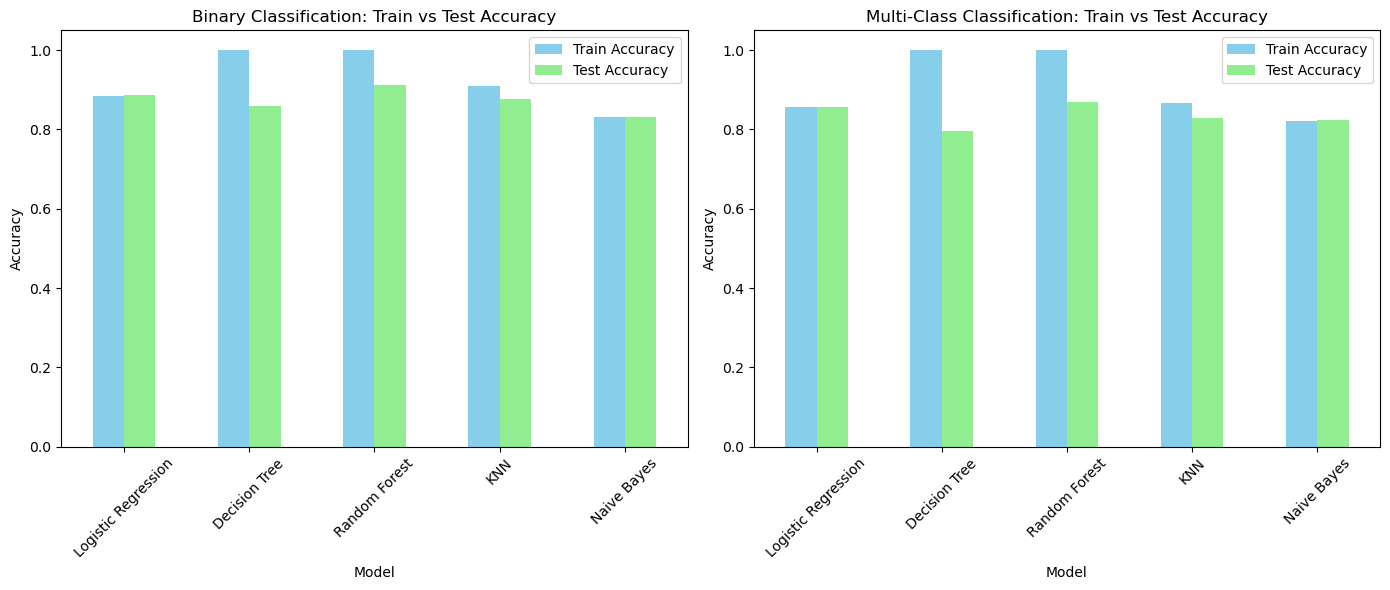

In [13]:
# Plot results for visual comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
binary_results_df.plot(kind="bar", ax=axes[0], color=["skyblue", "lightgreen"])
axes[0].set_title("Binary Classification: Train vs Test Accuracy")
axes[0].set_ylabel("Accuracy")
axes[0].set_xlabel("Model")
axes[0].legend(["Train Accuracy", "Test Accuracy"])
axes[0].tick_params(axis="x", rotation=45)

multi_results_df.plot(kind="bar", ax=axes[1], color=["skyblue", "lightgreen"])
axes[1].set_title("Multi-Class Classification: Train vs Test Accuracy")
axes[1].set_ylabel("Accuracy")
axes[1].set_xlabel("Model")
axes[1].legend(["Train Accuracy", "Test Accuracy"])
axes[1].tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()

In [7]:
label_encoder = LabelEncoder()
# Fit and transform the failure_type column
data['failure_type_encoded'] = label_encoder.fit_transform(data['failure_type'])
data.head()

,Hydraulic_Pressure,Coolant_Pressure,Ambient_Temperature,Voltage,Humidity,Air_System_Pressure,Coolant_Temperature,Hydraulic_Oil_Temperature,Water_Flow_Rate,Water_Temperature,Detergent_Level,Spray_Pressure,Vibration,Motor_Current,Pressure_Stability_Index,Temperature_Fluctuation_Index,failure_type,machine_failure,failure_type_encoded
0,4191.532553,9477.038319,68.060735,391.681383,21.592705,1739.316899,39.552288,55.975067,8.811174,48.848427,84.602098,8.878892,0.959540,6.252381,92.392574,9.457657,No Failure,0,1
1,114.930508,4065.184833,58.723523,305.634903,28.636376,8150.838063,49.299931,77.929899,20.719820,36.162373,81.353792,13.706478,0.961670,12.753026,79.914694,21.200586,No Failure,0,1
2,3536.784786,20232.509260,35.810614,310.033271,85.757378,4571.068720,51.218995,88.430211,27.389474,60.175811,44.975164,21.274659,1.411609,20.768389,34.634005,21.953622,Water Flow Issue,1,4
3,3536.784786,9571.416572,99.594766,312.497265,27.538232,2800.432218,9.552506,53.169482,43.040007,71.721710,187.570550,13.108391,0.959376,12.977742,29.830664,16.834768,No Failure,0,1
4,3222.837160,5954.123999,86.799229,498.345732,71.679551,4371.996642,7.729608,33.198835,3.780080,48.246862,77.166300,7.872088,0.202929,9.305936,33.908943,29.998937,Water Flow Issue,1,4


In [8]:
# Display the mapping of encoded labels to original classes
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mapping (Encoded Values):")
for label, encoded_value in label_mapping.items():
    print(f"{label}: {encoded_value}")

Label Mapping (Encoded Values):
Detergent Level Low: 0
No Failure: 1
Pressure Drop: 2
Temperature Anomaly: 3
Water Flow Issue: 4


In [15]:
# Save the LabelEncoder to a file
encoder_path = r"C:\Users\ghaza\Desktop\FYP\Application\AI\models\label_encoder_6.pkl"
with open(encoder_path, 'wb') as encoder_file:
    pickle.dump(label_encoder, encoder_file)

In [17]:
export_path = r"C:\Users\ghaza\Desktop\FYP\Application\AI\data\processed\encoded_dataset.csv"

# Export the dataset
data.to_csv(export_path, index=False)

In [18]:
# Features and targets
X = data.drop(columns=["failure_type", "failure_type_encoded", "machine_failure"])  # Features
y_binary = data["machine_failure"]  # Binary target
y_multi = data["failure_type_encoded"]  # Multi-class target

# Split the dataset
X_train, X_test, y_train_binary, y_test_binary = train_test_split(X, y_binary, test_size=0.3, random_state=42, stratify=y_binary)
_, _, y_train_multi, y_test_multi = train_test_split(X, y_multi, test_size=0.3, random_state=42, stratify=y_multi)

C:\Users\ghaza\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
3828/3828 ━━━━━━━━━━━━━━━━━━━━ 26s 6ms/step - accuracy: 0.7206 - loss: 0.9585 - val_accuracy: 0.7243 - val_loss: 0.9264
Epoch 2/50
3828/3828 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.7250 - loss: 0.9254 - val_accuracy: 0.7243 - val_loss: 0.9261
Epoch 3/50
3828/3828 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 0.7269 - loss: 0.9188 - val_accuracy: 0.7243 - val_loss: 0.9236
Epoch 4/50
3828/3828 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.7215 - loss: 0.9299 - val_accuracy: 0.7243 - val_loss: 0.9231
Epoch 5/50
3828/3828 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.7219 - loss: 0.9294 - val_accuracy: 0.7243 - val_loss: 0.9237
Epoch 6/50
3828/3828 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7236 - loss: 0.9249 - val_accuracy: 0.7243 - val_loss: 0.9246
Epoch 7/50
3828/3828 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.7259 - loss: 0.9189 - val_accuracy: 0.7243 - val_loss: 0.9241
Epoch 8/50
3828/3828 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - accuracy: 0.7233 - loss: 0

C:\Users\ghaza\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ghaza\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ghaza\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


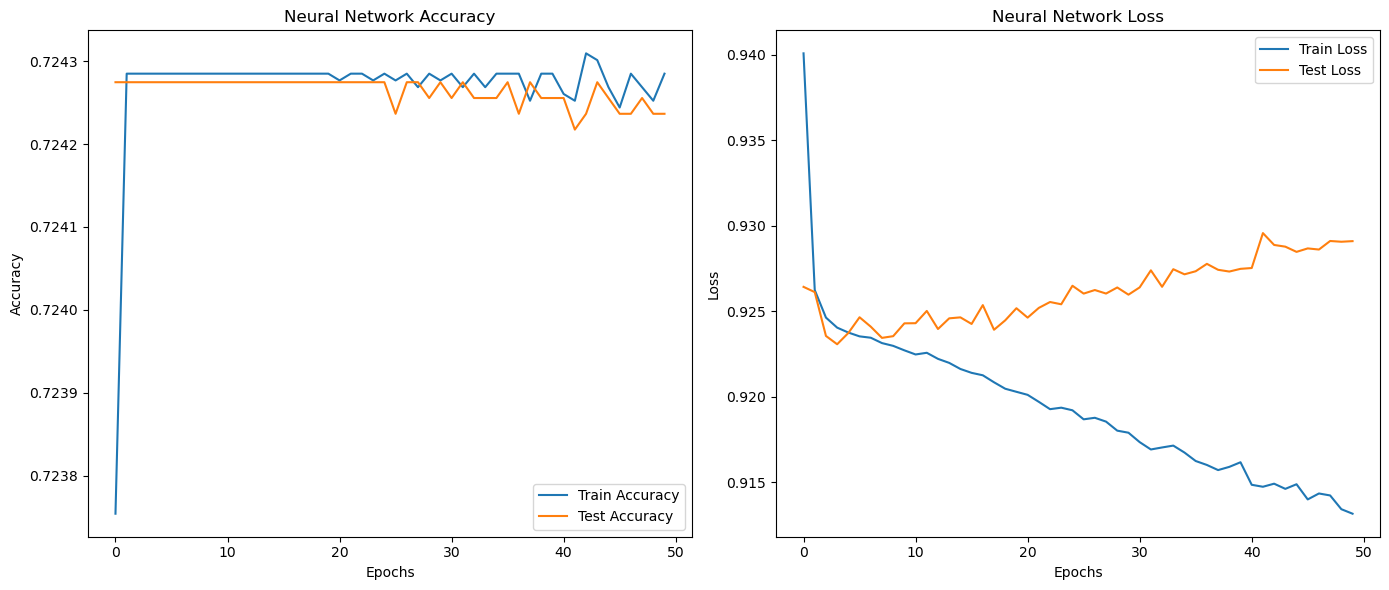

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

# One-hot encode multi-class target
y_train_multi_onehot = to_categorical(y_train_multi)
y_test_multi_onehot = to_categorical(y_test_multi)

# Build Neural Network
nn_model = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(y_train_multi_onehot.shape[1], activation='softmax')
])

# Compile and Train
nn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = nn_model.fit(X_train, y_train_multi_onehot, validation_data=(X_test, y_test_multi_onehot), epochs=50, batch_size=32)

# Evaluate
train_acc = nn_model.evaluate(X_train, y_train_multi_onehot, verbose=0)[1]
test_acc = nn_model.evaluate(X_test, y_test_multi_onehot, verbose=0)[1]

print(f"Neural Network Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}")
y_pred_nn = nn_model.predict(X_test).argmax(axis=1)
print("Neural Network Classification Report:")
print(classification_report(y_test_multi, y_pred_nn))

# Visualize Accuracy and Loss
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Neural Network Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Neural Network Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

In [20]:
from xgboost import XGBClassifier

# Train XGBoost
xgb_model = XGBClassifier(objective='multi:softmax', num_class=y_multi.nunique(), random_state=42)
xgb_model.fit(X_train, y_train_multi)

# Evaluate
y_pred_xgb = xgb_model.predict(X_test)
train_acc_xgb = accuracy_score(y_train_multi, xgb_model.predict(X_train))
test_acc_xgb = accuracy_score(y_test_multi, y_pred_xgb)

print(f"XGBoost Train Accuracy: {train_acc_xgb:.4f}, Test Accuracy: {test_acc_xgb:.4f}")
print("XGBoost Classification Report:")
print(classification_report(y_test_multi, y_pred_xgb))

XGBoost Train Accuracy: 0.7311, Test Accuracy: 0.7240
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2719
           1       0.72      1.00      0.84     38015
           2       0.00      0.00      0.00       803
           3       0.00      0.00      0.00      5508
           4       0.00      0.00      0.00      5442

    accuracy                           0.72     52487
   macro avg       0.14      0.20      0.17     52487
weighted avg       0.52      0.72      0.61     52487



In [21]:
from catboost import CatBoostClassifier

# Train CatBoost
cat_model = CatBoostClassifier(loss_function='MultiClass', iterations=1000, random_seed=42, verbose=100)
cat_model.fit(X_train, y_train_multi)

# Evaluate
y_pred_cat = cat_model.predict(X_test)
train_acc_cat = accuracy_score(y_train_multi, cat_model.predict(X_train))
test_acc_cat = accuracy_score(y_test_multi, y_pred_cat)

print(f"CatBoost Train Accuracy: {train_acc_cat:.4f}, Test Accuracy: {test_acc_cat:.4f}")
print("CatBoost Classification Report:")
print(classification_report(y_test_multi, y_pred_cat))

Learning rate set to 0.101114
0:	learn: 1.4431836	total: 338ms	remaining: 5m 37s
100:	learn: 0.9107233	total: 20.8s	remaining: 3m 5s
200:	learn: 0.8996563	total: 43.4s	remaining: 2m 52s
300:	learn: 0.8888554	total: 59.5s	remaining: 2m 18s
400:	learn: 0.8782540	total: 1m 11s	remaining: 1m 47s
500:	learn: 0.8681972	total: 1m 30s	remaining: 1m 30s
600:	learn: 0.8586929	total: 1m 52s	remaining: 1m 15s
700:	learn: 0.8494277	total: 2m 10s	remaining: 55.7s
800:	learn: 0.8402248	total: 2m 29s	remaining: 37.1s
900:	learn: 0.8313643	total: 2m 50s	remaining: 18.8s
999:	learn: 0.8223293	total: 3m 12s	remaining: 0us
CatBoost Train Accuracy: 0.7247, Test Accuracy: 0.7243
CatBoost Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2719
           1       0.72      1.00      0.84     38015
           2       0.00      0.00      0.00       803
           3       0.00      0.00      0.00      5508
           4       0.00      0.

C:\Users\ghaza\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ghaza\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ghaza\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<Figure size 1000x600 with 0 Axes>

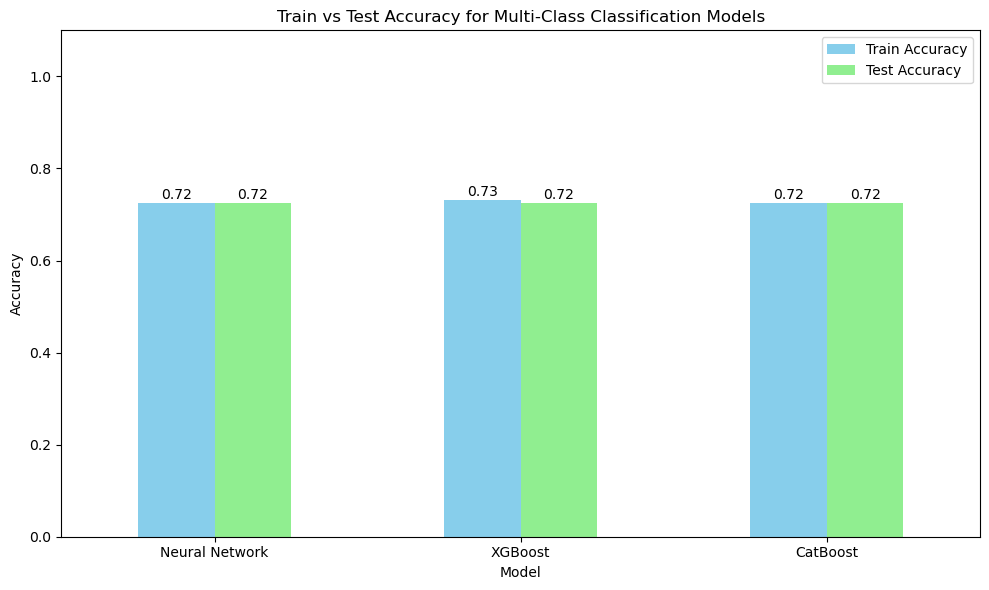

In [22]:
# Train-Test Accuracy Comparison
results = {
    "Model": ["Neural Network", "XGBoost", "CatBoost"],
    "Train Accuracy": [train_acc, train_acc_xgb, train_acc_cat],
    "Test Accuracy": [test_acc, test_acc_xgb, test_acc_cat]
}

results_df = pd.DataFrame(results)

# Bar Chart
plt.figure(figsize=(10, 6))
ax = results_df.set_index("Model").plot(kind='bar', rot=0, color=['skyblue', 'lightgreen'], figsize=(10, 6))
plt.title("Train vs Test Accuracy for Multi-Class Classification Models")
plt.ylabel("Accuracy")
plt.ylim(0, 1.1)
for p in ax.patches:
    plt.text(p.get_x() + p.get_width() / 2, p.get_height() + 0.01, f"{p.get_height():.2f}", ha='center')
plt.tight_layout()
plt.show()

In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import joblib

# Load the full training set used for binary and multi models
df_train = pd.read_csv("C:/Users/ghaza/Desktop/FYP/Application/AI/data/processed/cleaned_dataset.csv")

binary_columns = [
    "Water_Flow_Rate",
    "Temperature_Fluctuation_Index",
    "Pressure_Stability_Index",
    "Detergent_Level",
    "Hydraulic_Pressure",
    "Coolant_Temperature"
]

multi_columns = [
    "Water_Flow_Rate",
    "Temperature_Fluctuation_Index",
    "Pressure_Stability_Index",
    "Detergent_Level",
    "Hydraulic_Pressure",
    "Hydraulic_Oil_Temperature"
]

In [9]:
X_train_binary = df_train[binary_columns]
X_train_multi = df_train[multi_columns]

In [11]:
scaler_binary = StandardScaler().fit(X_train_binary)
scaler_multi = StandardScaler().fit(X_train_multi)

In [13]:
joblib.dump(scaler_binary, r"C:\Users\ghaza\Desktop\FYP\Application\AI\models\scaler_binary_6.pkl")
joblib.dump(scaler_multi, r"C:\Users\ghaza\Desktop\FYP\Application\AI\models\scaler_multi_6.pkl")

print("Scalers saved successfully.")

Scalers saved successfully.
